<a href="https://colab.research.google.com/github/appy09/regression/blob/main/Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bike Sharing Dataset 

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.



Data Set Information:


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

step 0 - import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

step 1- read the data


In [2]:
bikes=pd.read_csv('/content/drive/MyDrive/Dataset/hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


step 2- prelim analysis and feature selection 

In [3]:
bikes_prep= bikes.copy()
bikes_prep=bikes_prep.drop(['index','date','casual','registered'],axis=1)

In [4]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


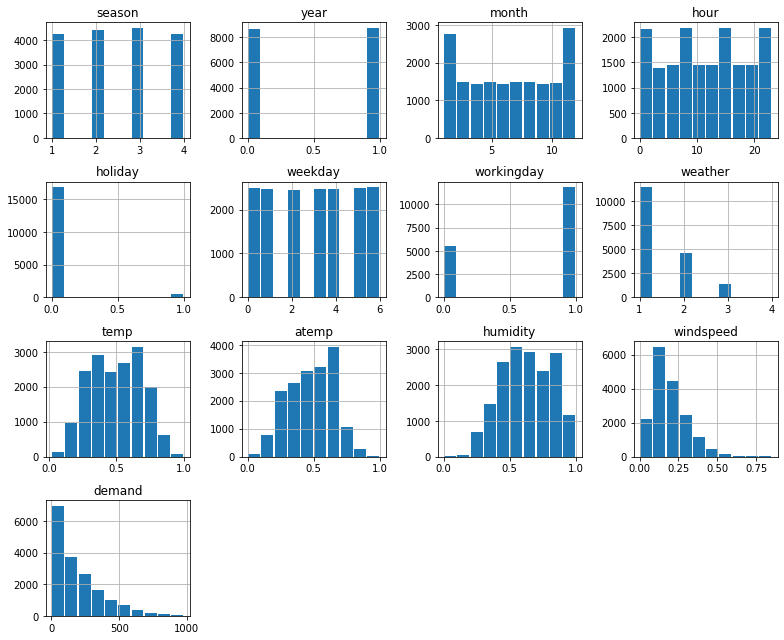

In [5]:
#check missing values
bikes_prep.hist(rwidth=0.9,figsize=(11,9))
plt.tight_layout() 

Conclusion- predicted variable is not normally distributed

step 3- data visualization



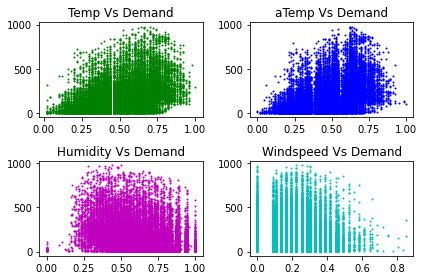

In [6]:
# visualize the continuous features Vs demand
plt.subplot(2,2,1)
plt.title("Temp Vs Demand")
plt.scatter(bikes_prep['temp'],bikes['demand'],s=1,c='g')

plt.subplot(2,2,2)
plt.title("aTemp Vs Demand")
plt.scatter(bikes_prep['atemp'],bikes['demand'],s=1,c='b')

plt.subplot(2,2,3)
plt.title("Humidity Vs Demand")
plt.scatter(bikes_prep['humidity'],bikes['demand'],s=1,c='m')

plt.subplot(2,2,4)
plt.title("Windspeed Vs Demand")
plt.scatter(bikes_prep['windspeed'],bikes['demand'],s=1,c='c')

plt.tight_layout()

Conclusion:


*   temp and demand appears to have direct correlation
*   the plot for temp and atemp appears almost identical

*   humdity and windspeed affect demand but need more statistical analysis





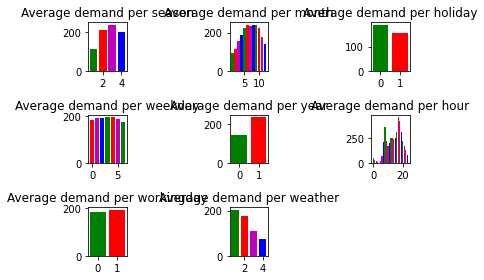

In [7]:
#plot categorical features Vs demand
#create 3x3 subplot
clrs=['g','r','m','b']

#1- season
plt.subplot(3,3,1)
plt.title('Average demand per season')
cat_list=bikes_prep['season'].unique()
#create avg demand per season using groupby
cat_avg=bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

#2- month
plt.subplot(3,3,2)
plt.title('Average demand per month')
cat_list=bikes_prep['month'].unique()
#create avg demand per month using groupby
cat_avg=bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

#3- holiday
plt.subplot(3,3,3)
plt.title('Average demand per holiday')
cat_list=bikes_prep['holiday'].unique()
#create avg demand per holiday using groupby
cat_avg=bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

#4- weekday
plt.subplot(3,3,4)
plt.title('Average demand per weekday')
cat_list=bikes_prep['weekday'].unique()
#create avg demand per weekday using groupby
cat_avg=bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

#5- year
plt.subplot(3,3,5)
plt.title('Average demand per year')
cat_list=bikes_prep['year'].unique()
#create avg demand per year using groupby
cat_avg=bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

#6- hour
plt.subplot(3,3,6)
plt.title('Average demand per hour')
cat_list=bikes_prep['hour'].unique()
#create avg demand per hour using groupby
cat_avg=bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

#7- workingday
plt.subplot(3,3,7)
plt.title('Average demand per workingday')
cat_list=bikes_prep['workingday'].unique()
#create avg demand per workingday using groupby
cat_avg=bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

#8- weather
plt.subplot(3,3,8)
plt.title('Average demand per weather')
cat_list=bikes_prep['weather'].unique()
#create avg demand per weather using groupby
cat_avg=bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg,color=clrs)

plt.tight_layout()


Conclusion:


*   there is variation in demand based on 
       

1.   season 
2.   month
3.   holiday
4.   hour
5.   weather

*   no significant  change in demand due to weekday or workiingday


*   year wise growth pattern does not considered due to limited number of years
*   so drop year, weekday and working day



In [9]:
#check for outliers
print(bikes_prep['demand'].describe())
print()
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64



0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

step 4- check multiple linear regression assumptions 

In [10]:
#linearity using correlation coefficient matrix using corr()
correlation=bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


step 5- drop unwanted columns

In [13]:
#drop either temp or atemp(muliticolinearity)
#drop windspeed due to less correlation

bikes_prep=bikes_prep.drop(['weekday','workingday','year','atemp','windspeed'],axis=1)
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f1015820a90>)

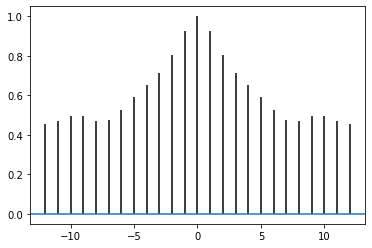

In [14]:
#test the autocorrelation in demand using acorr
df1=pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(df1,maxlags=12)

conclusion:   there is high autocorrelation for demand feature

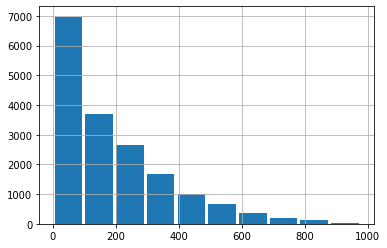

In [15]:
bikes_prep['demand'].hist(rwidth=0.9)


this is log normal distribution and it will normal after taking log of records of demand column

step 6 - create/modify new features

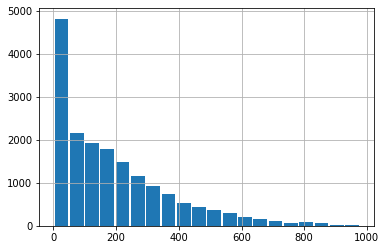

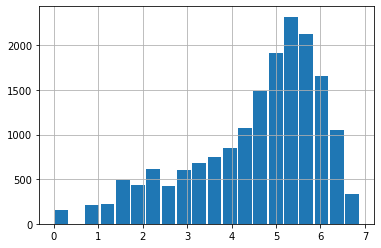

In [16]:
#normalize the feature 'demand' using log
df1 =bikes_prep['demand']
df2=np.log(df1)
plt.figure()
df1.hist(rwidth=0.9,bins=20)

plt.figure()
df2.hist(rwidth=0.9,bins=20)

In [17]:
#normalization successful as seen above plot
# so we can modify demand
bikes_prep['demand']=np.log(bikes_prep['demand'])

In [18]:
#solving the problem of autocorrelation in demand column
t_1=bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [19]:
t_2=bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']
t_3=bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

bikes_prep_lag=pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)
bikes_prep_lag=bikes_prep_lag.dropna()

step 7- create dummy variable and drop 


In [20]:
#first to avoid dummy variable trap using get_dummies
#only for categorical columns- season,holiday,weather,month,hour
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [21]:
#all categorical columns are in int type
#so changed them to category dtype
bikes_prep_lag['season']=bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday']=bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather']=bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month']=bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour']=bikes_prep_lag['hour'].astype('category')

bikes_prep_lag=pd.get_dummies(bikes_prep_lag,drop_first=True)
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Step 8- create train and test split

In [22]:
# remember demand is time dependent as seen in autocorrelation
# so manual split process
Y= bikes_prep_lag[['demand']]
X= bikes_prep_lag.drop(['demand'],axis=1)

In [23]:
#create 70% size
sz=0.7*len(X)
sz=int(sz)

In [24]:
#create train and test
X_train=X.values[0:sz]
X_test=X.values[sz:len(X)]

Y_train=Y.values[0:sz]
Y_test=Y.values[sz:len(Y)]

step 9- fit and score the model

In [25]:
#linera regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.9195240591465778
0.9287151360253384


In [26]:
#generate Y_predictions
Y_pred=lr.predict(X_test)

step 10: root mean squared error(RMSE)


In [27]:
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(Y_test,Y_pred))
rmse

0.38098800498170443

calculate Root mean squred logarithmic error(RMSLE)

preffered for 

non-negative predictions and 

less variation for small and large predictions

In [29]:
Y_test

array([[3.58351894],
       [2.39789527],
       [1.94591015],
       ...,
       [4.49980967],
       [4.11087386],
       [3.8918203 ]])

In [30]:
Y_pred

array([[3.21001759],
       [2.86500541],
       [3.21845645],
       ...,
       [4.28217873],
       [4.20477445],
       [3.64981435]])

In [32]:
Y_test_e=[]
Y_pred_e=[]

#convert float values to int
for i in range (0,len(Y_test)):
  Y_test_e.append(math.exp(Y_test[i]))
  Y_pred_e.append(math.exp(Y_pred[i]))
log_sq_sum=0
for i in range (0,len(Y_test)):
  log_a=math.log(Y_test_e[i]+1)      #for actual values
  log_p=math.log(Y_pred_e[i]+1)      #for predicted values
  log_diff=(log_p - log_a)**2
  log_sq_sum=log_sq_sum + log_diff

rmsle=math.sqrt((log_sq_sum/len(Y_test)))
rmsle


0.3560941706980211